<a href="https://colab.research.google.com/github/tranbaquang1708/GraduationThesis/blob/develop/IGR_2d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys
import os
mp = os.path.abspath(os.path.join('/content/drive/My Drive/GraduationThesis/gitrepo/GraduationThesis/'))
sys.path.append(mp)

In [ ]:
import torch
from modules import IGR, Visualization, Operation, Distribution

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
# Load points
filename = mp + '/dataset/2d/riderr.vert'
dataset, normal_vectors = Operation.read_txt_omit2(filename, 0.8, device)

In [ ]:
traineddata_path = mp + '/models/riderr_omit_0.2_uniform_gaussian.traineddata'
model = IGR.load_model(traineddata_path, device)

Step 500:
tensor(1.0118, device='cuda:0', grad_fn=<AddBackward0>)
Step 1000:
tensor(0.6987, device='cuda:0', grad_fn=<AddBackward0>)
Step 1500:
tensor(0.5163, device='cuda:0', grad_fn=<AddBackward0>)
Step 2000:
tensor(0.3674, device='cuda:0', grad_fn=<AddBackward0>)
Step 2500:
tensor(0.2993, device='cuda:0', grad_fn=<AddBackward0>)
Step 3000:
tensor(0.2721, device='cuda:0', grad_fn=<AddBackward0>)
Step 3500:
tensor(0.1977, device='cuda:0', grad_fn=<AddBackward0>)
Step 4000:
tensor(0.1665, device='cuda:0', grad_fn=<AddBackward0>)
Step 4500:
tensor(0.1402, device='cuda:0', grad_fn=<AddBackward0>)
Step 5000:
tensor(0.1980, device='cuda:0', grad_fn=<AddBackward0>)
Step 5500:
tensor(0.1443, device='cuda:0', grad_fn=<AddBackward0>)
Step 6000:
tensor(0.1882, device='cuda:0', grad_fn=<AddBackward0>)
Step 6500:
tensor(0.1374, device='cuda:0', grad_fn=<AddBackward0>)
Step 7000:
tensor(0.1191, device='cuda:0', grad_fn=<AddBackward0>)
Step 7500:
tensor(0.0911, device='cuda:0', grad_fn=<AddBackward

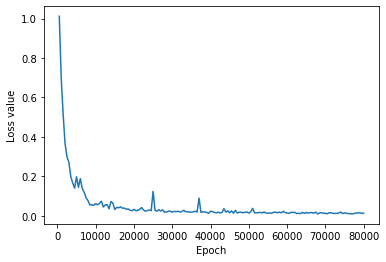

In [ ]:
loss_function = IGR.LossFunction(1, 0.01, Distribution.uniform_gaussian)
# loss_function = IGR.LossFunction()
model = IGR.train(dataset, normal_vectors, 80000, 50, device, loss_function, model=model)

In [ ]:
IGR.save_model(traineddata_path, model)

In [ ]:
xx, yy = Visualization.grid_from_torch(dataset[:,0], dataset[:,1], resx=50, resy=50, device=device)

In [ ]:
output_path = 'g_norm_rider_omitted_0.2.txt'
z = Visualization.nn_sampling(model, xx, yy, g_norm_output_path = output_path, device=device)

Value of function on each grid point
tensor([[-3.9668, -3.7110, -3.4943,  ..., -8.8838, -9.2492, -9.6194],
        [-3.5709, -3.3442, -3.0821,  ..., -8.6132, -9.0032, -9.4166],
        [-3.1452, -2.9687, -2.7475,  ..., -8.4069, -8.8175, -9.2271],
        ...,
        [-3.8070, -3.3904, -2.9551,  ..., -3.8565, -3.9625, -4.1203],
        [-3.9371, -3.5225, -3.1270,  ..., -4.3191, -4.4146, -4.5564],
        [-4.1282, -3.8025, -3.3826,  ..., -4.7930, -4.8780, -5.0009]],
       device='cuda:0', grad_fn=<ViewBackward>)

Grad on each grid point
Minimum value: 0.057179782539606094
Maximum value: 1.8053840398788452
Norm of gradient saved


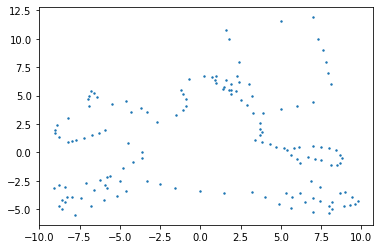

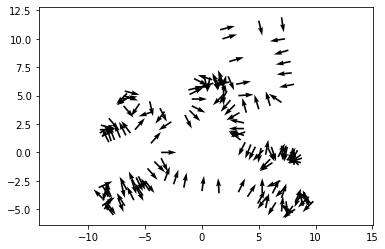

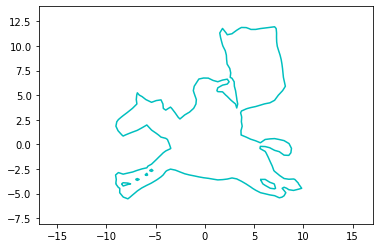

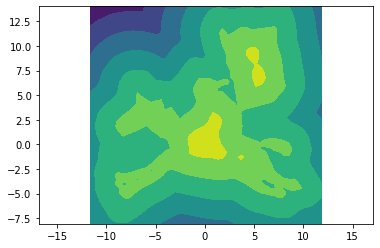

In [ ]:
Visualization.visualize2(dataset.detach().cpu().numpy(), normal_vectors.detach().cpu().numpy(), xx.detach().cpu().numpy(), yy.detach().cpu().numpy(), z.detach().cpu().numpy(), scatter=True, vecfield=True, surface=True, filled_contour=True)

In [ ]:
# x = torch.tensor([1,2,3,4])
# y = torch.tensor([5,6])
# x = torch.unsqueeze(x, dim=1)
# y = torch.unsqueeze(y, dim=1)
# z = torch.stack([x, y], dim=1)
# print(z)
# x = torch.rand(10,2)
# # print(x.sum(dim=0))
# x = torch.rand((10,2))
# y = torch.ones((5,2))
# z = torch.cat((x,y))
# z